# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/ML/"

Mounted at /content/drive


#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [3]:
#TODO
dataset = pd.read_csv(data_path+'/bank-full.csv', sep=';')
dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# train 80% val 10% test 10%
train_df, temp_df = train_test_split(dataset, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Normalize data
normalize numerical data.

In [6]:
# Normalize numerical data

numeric_cols = dataset.select_dtypes(include=['number']).columns
qualitative_cols = [feat for feat in dataset.columns if feat not in numeric_cols]

scaler = StandardScaler()
label_encoders = {col: LabelEncoder() for col in qualitative_cols}

# Standard scale numeric columns
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
val_df[numeric_cols] = scaler.transform(val_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Encode qualitative columns
for col in qualitative_cols:
    train_df[col] = label_encoders[col].fit_transform(train_df[col])
    val_df[col] = label_encoders[col].transform(val_df[col])
    test_df[col] = label_encoders[col].transform(test_df[col])


test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41690,1.890069,5,1,1,0,0.514698,0,0,0,-1.179203,10,-0.163077,-0.565886,-0.411364,-0.244772,3,1
5568,-1.311973,0,2,1,0,0.043319,1,0,2,0.862657,8,-0.739220,3.280083,-0.411364,-0.244772,3,0
23905,-0.652729,9,0,1,0,-0.447909,1,1,0,1.583313,1,0.062709,-0.245389,-0.411364,-0.244772,3,0
25779,-1.029440,0,1,1,0,-0.317576,0,0,0,0.382219,9,-0.805398,-0.565886,-0.411364,-0.244772,3,0
32686,-0.652729,0,1,1,0,-0.464779,1,1,0,0.142001,0,1.954639,-0.245389,-0.411364,-0.244772,3,0


In [15]:
features = dataset.columns[:-1]
x_train, x_val, x_test= train_df[features].to_numpy(), val_df[features].to_numpy(), test_df[features].to_numpy()
y_train, y_val, y_test = train_df['y'].to_numpy(), val_df['y'].to_numpy(), test_df['y'].to_numpy()

print('x_train shape is ', x_train.shape, y_train.shape)
print('x_val shape is ', x_val.shape, y_val.shape)
print('x_test shape is ', x_test.shape, y_test.shape)

x_train shape is  (36168, 16) (36168,)
x_val shape is  (4521, 16) (4521,)
x_test shape is  (4522, 16) (4522,)


# Create Data Loader
create data loader for pytorch

In [16]:
#TODO
batch_size = 64
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Model
define your model in here

In [27]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 32) 
        self.fc3 = nn.Linear(32, 16) 
        self.fc4 = nn.Linear(16, 2)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x)) 
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [28]:
#TODO
from tqdm import tqdm

model = BankMarketingNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training progress bar
    train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)
    for batch in train_bar:
        inputs, targets = batch

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_bar.set_postfix(loss=loss.item())

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        val_bar = tqdm(val_loader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', leave=False)
        for batch in val_bar:
            inputs, targets = batch

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_bar.set_postfix(loss=loss.item())

    # Average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print epoch summary
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.3e}, Validation Loss: {val_loss:.3e}')

Epoch 1/20, Training Loss: 4.439e-01, Validation Loss: 4.280e-01


Epoch 2/20, Training Loss: 4.282e-01, Validation Loss: 4.199e-01


Epoch 3/20, Training Loss: 4.144e-01, Validation Loss: 4.139e-01


Epoch 4/20, Training Loss: 4.097e-01, Validation Loss: 4.128e-01


Epoch 5/20, Training Loss: 4.084e-01, Validation Loss: 4.122e-01


Epoch 6/20, Training Loss: 4.076e-01, Validation Loss: 4.120e-01


Epoch 7/20, Training Loss: 4.078e-01, Validation Loss: 4.117e-01


Epoch 8/20, Training Loss: 4.070e-01, Validation Loss: 4.128e-01


Epoch 9/20, Training Loss: 4.066e-01, Validation Loss: 4.117e-01


Epoch 10/20, Training Loss: 4.064e-01, Validation Loss: 4.116e-01


Epoch 11/20, Training Loss: 4.066e-01, Validation Loss: 4.115e-01


Epoch 12/20, Training Loss: 4.061e-01, Validation Loss: 4.105e-01


Epoch 13/20, Training Loss: 4.058e-01, Validation Loss: 4.095e-01


Epoch 14/20, Training Loss: 4.054e-01, Validation Loss: 4.098e-01


Epoch 15/20, Training Loss: 4.050e-01, Validation Loss: 4.105e-01


Epoch 16/20, Training Loss: 4.050e-01, Validation Loss: 4.099e-01


Epoch 17/20, Training Loss: 4.043e-01, Validation Loss: 4.099e-01


Epoch 18/20, Training Loss: 4.044e-01, Validation Loss: 4.098e-01


Epoch 19/20, Training Loss: 4.035e-01, Validation Loss: 4.098e-01


Epoch 20/20, Training Loss: 4.037e-01, Validation Loss: 4.110e-01


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

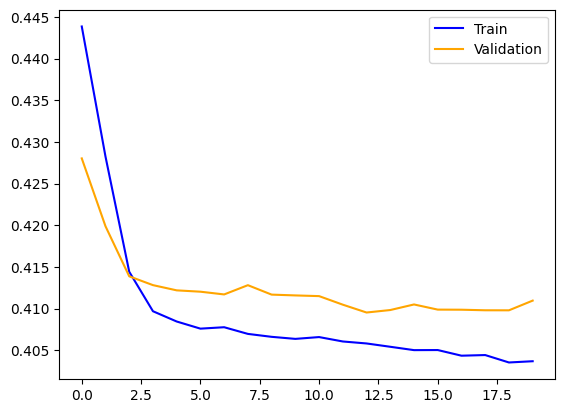

In [29]:
#TODO
plt.plot(train_losses, label='Train', color='blue')
plt.plot(val_losses, label='Validation', color='orange')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [30]:
#TODO

model.eval()

correct = 0
total = 0
with torch.no_grad():
  test_bar = tqdm(test_loader, desc=f'Test', leave=False)
  for batch in test_bar:
    inputs, targets = batch

    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)

    total += targets.size(0)
    correct += predicted.eq(targets).sum().item()

accuracy = 100. * correct/total
print(f'Accuracy: {accuracy}%')


Accuracy: 89.69482529854047%
